In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/CRYPTO/Preprocessed_data/data.csv"

data = pd.read_csv(file_path)


In [ ]:
Volume_data=data["45"]

In [ ]:
import numpy as np
nan_indexes = np.where(np.isnan(Volume_data))[0]

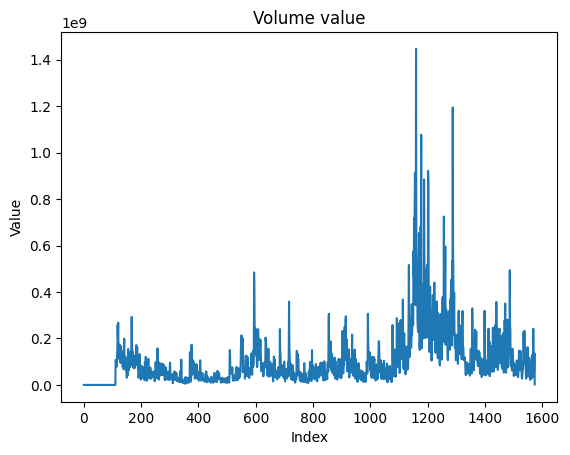

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Volume_data)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Volume value')
plt.show()

In [ ]:
nan_indexes[:5]

array([1574, 1575, 1576, 1577, 1578])

In [ ]:
DATA=np.empty((2344,5))

In [ ]:
Halving=data["49"]

In [ ]:
BTC_OPEN=data["0"]
BTC_HIGH=data["1"]
BTC_LOW=data["2"]
BTC_CLOSE=data["3"]

In [ ]:
for x in range(len(DATA)):
    DATA[x][0]=BTC_OPEN[x]
    DATA[x][1]=BTC_HIGH[x]
    DATA[x][2]=BTC_LOW[x]
    DATA[x][3]=BTC_CLOSE[x]
    DATA[x][4]=Halving[x]


In [ ]:
X=DATA
y=Volume_data

In [ ]:
train_size=1574

In [ ]:
import numpy as np

def reshape_data_mlt(data,targets, n_timesteps, feature_indices):
    n_samples, n_features = data.shape

    reshaped_data_X = np.zeros((n_samples - n_timesteps, n_timesteps, len(feature_indices)))
    reshaped_data_y = np.zeros((n_samples - n_timesteps, 1))

    for i in range(n_samples - n_timesteps):
        selected_features_X = data[i:i+n_timesteps, feature_indices]
        selected_features_y = targets[i+n_timesteps]
        reshaped_data_X[i] = selected_features_X
        reshaped_data_y[i] = selected_features_y

    return reshaped_data_X, reshaped_data_y


In [ ]:
n_timesteps=30

In [ ]:
y.shape

(2344,)

In [ ]:
y= np.expand_dims(y, axis=1)

In [ ]:
y.shape

(2344, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaler.fit(X)
y_scaler.fit(y)

X_scaled = X_scaler.transform(X)


In [ ]:
X_train=X_scaled[:train_size]
y_train=y[:train_size]

X_pred=X_scaled[train_size-30:]
y_pred=y[train_size-30:]

In [ ]:
y_scaled = y_scaler.transform(y_train)

In [ ]:
y_train=y_scaled

In [ ]:
X_train_reshaped,y_train_reshaped=reshape_data_mlt(X_train,y_train, n_timesteps, [0,1,2,3,4])

In [ ]:
y_train_reshaped

array([[5.83406689e-06],
       [7.71802084e-06],
       [6.40121280e-06],
       ...,
       [4.43758727e-02],
       [9.43663821e-02],
       [1.45841009e-03]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout, BatchNormalization, Bidirectional
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='mae', factor=0.2, patience=8, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='mae', patience=15, restore_best_weights=True)


model = Sequential()

model.add(LSTM(100, input_shape=(n_timesteps, 5), return_sequences=True))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(BatchNormalization())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae","mse"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           42400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [ ]:
model.fit(X_train_reshaped,y_train_reshaped,epochs=100,batch_size=64,callbacks=[early_stopping,reduce_lr])

Epoch 1/100
25/25 [==============================] - 11s 126ms/step - loss: 0.0466 - mae: 0.1466 - mse: 0.0466 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 2s 76ms/step - loss: 0.0105 - mae: 0.0624 - mse: 0.0105 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 2s 71ms/step - loss: 0.0094 - mae: 0.0589 - mse: 0.0094 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 2s 70ms/step - loss: 0.0099 - mae: 0.0609 - mse: 0.0099 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 2s 70ms/step - loss: 0.0102 - mae: 0.0603 - mse: 0.0102 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 2s 70ms/step - loss: 0.0092 - mae: 0.0575 - mse: 0.0092 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0096 - mae: 0.0596 - mse: 0.0096 - lr: 0.0010
Epoch 8/100
25/25 [==============================] - 3s 128ms/step - loss: 0.0100 - mae: 0.0598 - mse: 0.0100 - lr: 0.0010
Epoch 9/100
25/25 [==

In [ ]:
len(y_pred)

800

In [ ]:
y_pred.shape

(800, 1)

In [ ]:
X_pred

array([[0.4965989 , 0.50190902, 0.49223506, 0.50462433, 0.        ],
       [0.50463812, 0.50854787, 0.51248797, 0.50834889, 0.        ],
       [0.50838866, 0.5045675 , 0.49369019, 0.48271721, 0.        ],
       ...,
       [0.94011913, 0.95082432, 0.96356972, 0.946727  , 0.        ],
       [0.94678329, 0.98531798, 0.96668978, 0.97920961, 0.        ],
       [0.97929779, 0.97112372, 0.95666453, 0.93825164, 0.        ]])

In [ ]:

X_pred_reshaped,y_pred_reshaped=reshape_data_mlt(X_pred,y_pred, n_timesteps, [0,1,2,3,4])

In [ ]:
X_pred_reshaped

array([[[0.4965989 , 0.50190902, 0.49223506, 0.50462433, 0.        ],
        [0.50463812, 0.50854787, 0.51248797, 0.50834889, 0.        ],
        [0.50838866, 0.5045675 , 0.49369019, 0.48271721, 0.        ],
        ...,
        [0.51347126, 0.51796698, 0.50009213, 0.49355237, 0.        ],
        [0.49353086, 0.57446266, 0.50374972, 0.57205925, 0.        ],
        [0.5721142 , 0.58912245, 0.58349948, 0.58868712, 0.        ]],

       [[0.50463812, 0.50854787, 0.51248797, 0.50834889, 0.        ],
        [0.50838866, 0.5045675 , 0.49369019, 0.48271721, 0.        ],
        [0.48263221, 0.48072893, 0.48698087, 0.48560378, 0.        ],
        ...,
        [0.49353086, 0.57446266, 0.50374972, 0.57205925, 0.        ],
        [0.5721142 , 0.58912245, 0.58349948, 0.58868712, 0.        ],
        [0.58876743, 0.59315194, 0.59054741, 0.58252334, 0.        ]],

       [[0.50838866, 0.5045675 , 0.49369019, 0.48271721, 0.        ],
        [0.48263221, 0.48072893, 0.48698087, 0.48560378, 0. 

In [ ]:
X_pred_reshaped.shape

(770, 30, 5)

In [ ]:
pred=model.predict(X_pred_reshaped)

25/25 [==============================] - 2s 16ms/step


In [ ]:
len(pred)

770

In [ ]:
y_train=y_scaler.inverse_transform(y_train)

In [ ]:
Y=y_train.flatten()

In [ ]:
pred=y_scaler.inverse_transform(pred)

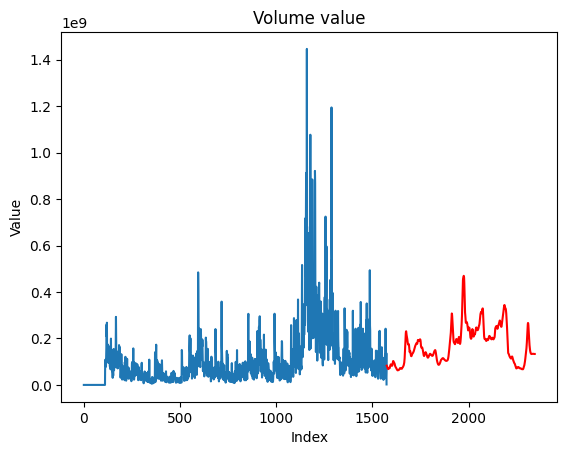

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Y)
plt.plot(range(1574, len(BTC_CLOSE)), pred, color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Volume value')
plt.show()

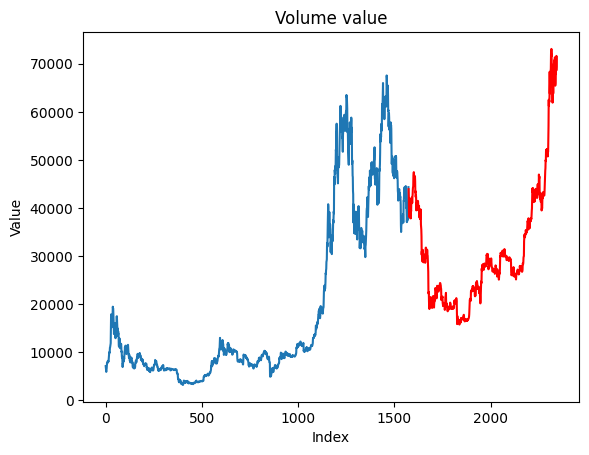

In [ ]:
import matplotlib.pyplot as plt
BTC_CF=BTC_CLOSE[:1574]
BTC_CS=BTC_CLOSE[1574:]

plt.plot(BTC_CF)
plt.plot(range(1574, len(BTC_CLOSE)), BTC_CS, color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('BTC price')
plt.show()

Niestety model nie sprawuje się najlepiej, wyniki powinny w pewnym stopniu pokrywać się z ceną  BTC, zamiast tego zatrzymały się pewnym przedziale.

Dane są silnie nieliniowe, na tyle silnie że zastosowanie kilku aktywacji nieliniowych przynosi niewielką poprawę, daleką od tego co chcemy uzyskać.

Wyszkolenie potrzebnego nam modelu może nas kosztować więcej czasu niż warte są dane które chcemy uzyskać

W takim razie użyjemy trochę prostszej metody, która szybciej da nam wyniki zbliżone do tego co chcemy osiągnąć

Zawsze gdy cena BTC rośnie, jego Volume rośnie drastycznie, gdy cena BTC spada, jego Volume również drastycznie spada.

Możemy stworzyć listę czynnika k(x)=Volume(x)/BTC_CLOSE(x)

W ten sposób określimy związek między ceną a Volume dla konkretnych cen


In [ ]:
k=[]
for x in range(train_size):
    this_k=Volume_data[x]/BTC_CLOSE[x]
    k.append(this_k)

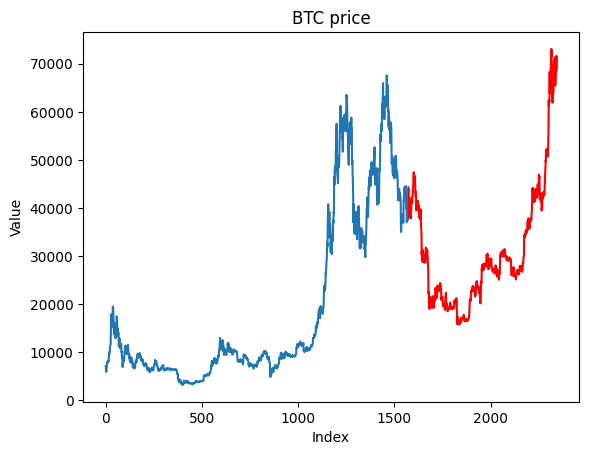

In [ ]:
import matplotlib.pyplot as plt
BTC_CF=BTC_CLOSE[:1574]
BTC_CS=BTC_CLOSE[1574:]

plt.plot(BTC_CF)
plt.plot(range(1574, len(BTC_CLOSE)), BTC_CS, color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('BTC price')
plt.show()

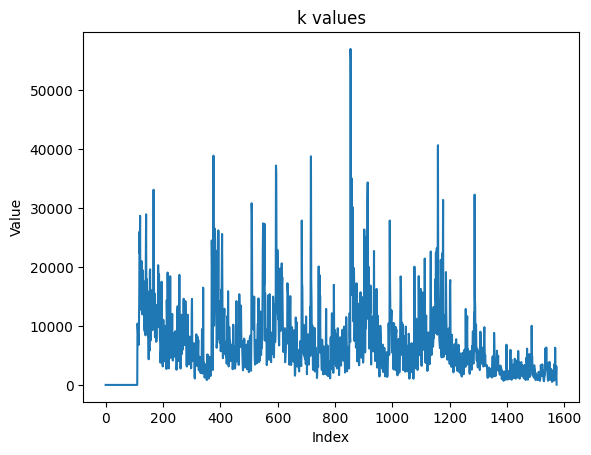

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('k values')
plt.show()

In [ ]:
k_BTC=np.empty((train_size,2))

In [ ]:
for x in range(len(k_BTC)):
    k_BTC[x][0]=k[x]
    k_BTC[x][1]=BTC_CLOSE[x]


Brakujące Volume obliczymy w następujący sposób

Pomnożymy cenę BTC przez k odpowiadające najbliższej do naszego aktualnego BTC price zarejestrowanej wcześniej cenie.

Musimy jednak pamiętać że korelacja Volume oraz BTC price jest zazwyczaj przesunięta o kilka dni. Duży Volume występuje zazwyczaj kilka dni przed lub po wystąpieniu wysokiej ceny.

Dlatego właśnie wprowadzimy czynnik depth. Kiedy już zidentyfikujemy czynnik k dla danej cenny, sprawdzimy czy "obok", nie znajduje się większy czynnik.
Jako k, weźmiemy największy czynnik w sąsiedztwie.

W związku  z tym wyniki mogą wydawać się lekko zawyżone, jednak musimy pamiętać że z upływem czasu, coraz więcej osób korzysta z BTC nie tylko jako inwestycja lecz jako narzędzie płatności, sprawia to że z upływem czasu czynnik k rośnie samoistnie, w oderwaniu od ceny BTC. Pamiętając o tym, lekkie zawyżenie czynnika k, może nam dać wyniki bliższe prawdzie.


In [ ]:

import numpy as np

def determine_k(x):
    array = BTC_CLOSE[:train_size]

    absolute_diff = np.abs(array - x)

    closest_index = np.argmin(absolute_diff)
    closest_value = array[closest_index]

    indices = np.where(array == closest_value)[0]

    index=indices[0]

    depth=2

    if(index<depth):
        pre_search_field=np.arange(index-index,index)
    else:
        pre_search_field=np.arange(index-depth,index)

    if(index+depth>1574):
        post_search_field=np.arange(index+1,index+(1574-index))
    else:
        post_search_field=np.arange(index+1,index+depth)


    search_field=np.concatenate((pre_search_field,indices,post_search_field),axis=0)

    search_field_k=[]
    for x in search_field:
        search_field_k.append(k_BTC[x][0])

    k=np.max(search_field_k)

    return k


In [ ]:
2344-train_size

770

In [ ]:
BTC_past_train_size_series=BTC_CLOSE[train_size:]
BTC_past_train_size_list = BTC_past_train_size_series.tolist()
calc_Volume=[]
for x in range(2344-train_size):
    k=determine_k(BTC_past_train_size_list[x])

    val=BTC_past_train_size_list[x]
    vol=k*val

    calc_Volume.append(vol)

In [ ]:
VOL=np.append(y_train,calc_Volume)

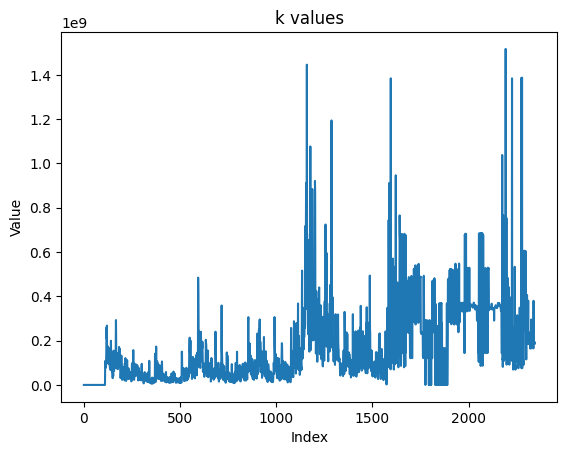

In [ ]:
import matplotlib.pyplot as plt

plt.plot(VOL)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('New Volume')
plt.show()

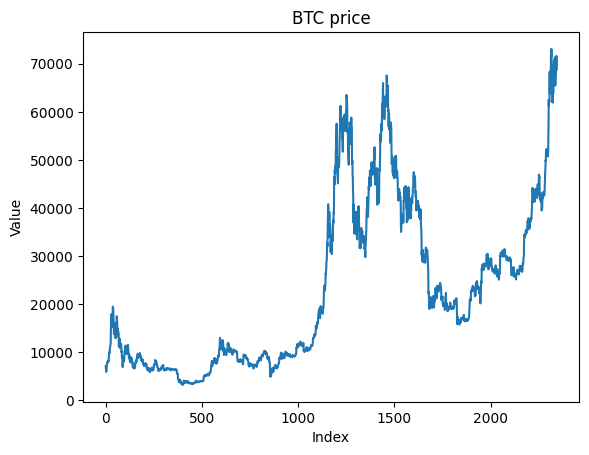

In [ ]:
import matplotlib.pyplot as plt

plt.plot(BTC_CLOSE)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('BTC price')
plt.show()

Jak widizmy na wykresach, udało nam się wyliczyć Volume, który w dużej mierze pokrywa się z ceną BTC, oraz w pewnym stopniu rośnie samoistnie w oderwaniu od niej.

Teraz musimy jedynie sprawdzić czy tak uzupełnione dane poprawią jakość naszego modelu

In [ ]:
df=pd.DataFrame(VOL)

file_path="/content/drive/MyDrive/CRYPTO/Preprocessed_data/Volume.csv"

df.to_csv(file_path,index=False)